<a href="https://colab.research.google.com/github/ZulkifliAnwar48/202055202091/blob/master/data_ban.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download zulkiflianwar/data-ban-mobil-motor
!mkdir dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
mkdir: cannot create directory ‘dataset’: File exists


In [4]:
!unzip /content/Ban-mobil-motor-truck.zip -d /content/dataset

Archive:  /content/Ban-mobil-motor-truck.zip
   creating: /content/dataset/Ban-mobil-motor-truck/
   creating: /content/dataset/Ban-mobil-motor-truck/ban mobil/
  inflating: /content/dataset/Ban-mobil-motor-truck/ban mobil/download (27) - Copy.jpg  
  inflating: /content/dataset/Ban-mobil-motor-truck/ban mobil/download (27).jpg  
  inflating: /content/dataset/Ban-mobil-motor-truck/ban mobil/download (30) - Copy.jpg  
  inflating: /content/dataset/Ban-mobil-motor-truck/ban mobil/download (30).jpg  
  inflating: /content/dataset/Ban-mobil-motor-truck/ban mobil/download (32) - Copy.jpg  
  inflating: /content/dataset/Ban-mobil-motor-truck/ban mobil/download (32).jpg  
  inflating: /content/dataset/Ban-mobil-motor-truck/ban mobil/download (33) - Copy.jpg  
  inflating: /content/dataset/Ban-mobil-motor-truck/ban mobil/download (33).jpg  
  inflating: /content/dataset/Ban-mobil-motor-truck/ban mobil/download (34) - Copy.jpg  
  inflating: /content/dataset/Ban-mobil-motor-truck/ban mobil/down

In [5]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [6]:
dataset_path = Path(r'/content/dataset')
file_path = list(dataset_path.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [7]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)
df = pd.concat([file_path, labels], axis=1)
df.columns = ['image', 'label']
df.head()

,image,label
0,/content/dataset/Ban-mobil-motor-truck/ban mob...,ban mobil
1,/content/dataset/Ban-mobil-motor-truck/ban mob...,ban mobil
2,/content/dataset/Ban-mobil-motor-truck/ban mob...,ban mobil
3,/content/dataset/Ban-mobil-motor-truck/ban mob...,ban mobil
4,/content/dataset/Ban-mobil-motor-truck/ban mob...,ban mobil


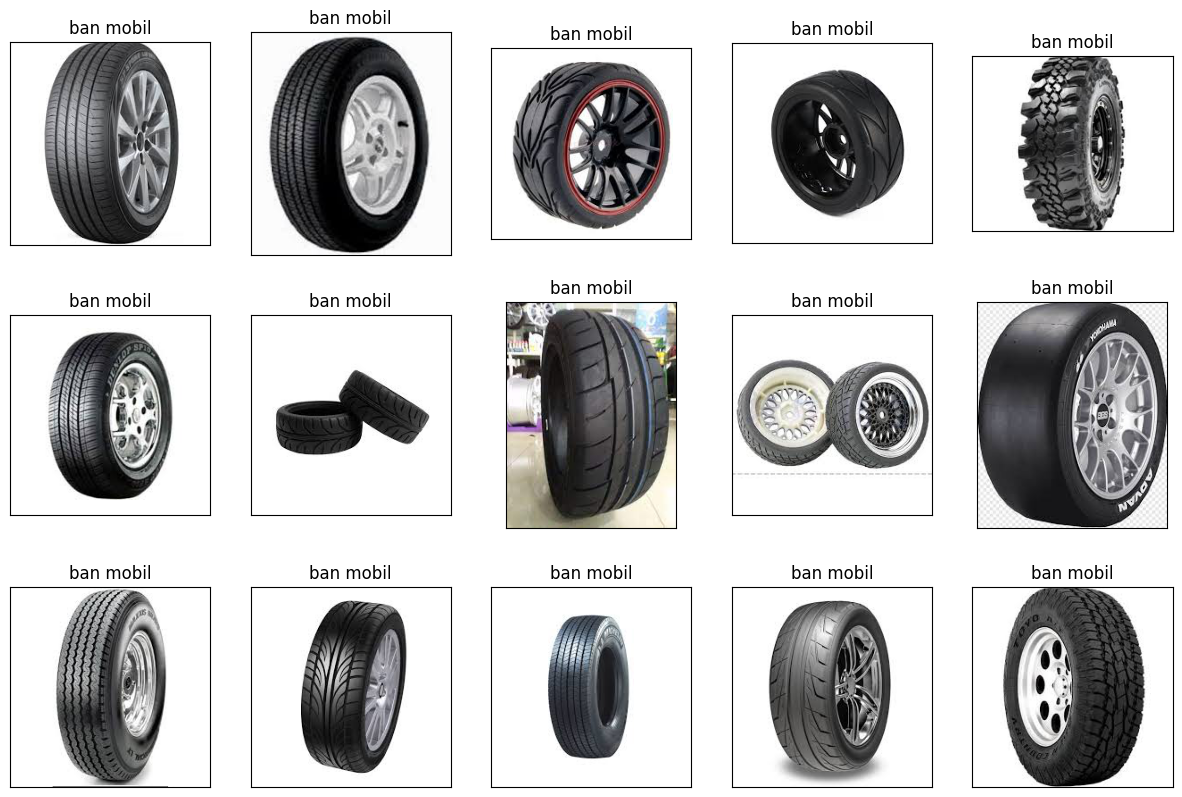

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])

In [9]:
df.label.value_counts()

ban motor    101
ban mobil    100
ban truck    100
Name: label, dtype: int64

In [10]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

ban motor    101
ban mobil    100
ban truck    100
Name: label, dtype: int64

In [11]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [12]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (168, 2)
Shape of test data (91, 2)
Shape of validation data (42, 2)


In [13]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)
     

Found 168 validated image filenames belonging to 3 classes.
Found 91 validated image filenames belonging to 3 classes.
Found 42 validated image filenames belonging to 3 classes.


In [14]:
input_shape = (200, 200, 3)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [21]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
history = model.fit(train, batch_size= 450, validation_data=val, epochs=35, callbacks=callback)
     

Epoch 1/35
6/6 [==============================] - 26s 4s/step - loss: 0.7824 - accuracy: 0.5833 - val_loss: 0.8068 - val_accuracy: 0.6667
Epoch 2/35
6/6 [==============================] - 23s 4s/step - loss: 0.8487 - accuracy: 0.5655 - val_loss: 1.3106 - val_accuracy: 0.5714
Epoch 3/35
6/6 [==============================] - 23s 4s/step - loss: 0.8673 - accuracy: 0.5595 - val_loss: 1.2095 - val_accuracy: 0.6667
Epoch 4/35
6/6 [==============================] - 24s 4s/step - loss: 0.8374 - accuracy: 0.5833 - val_loss: 0.8187 - val_accuracy: 0.6905
Epoch 5/35
6/6 [==============================] - 25s 4s/step - loss: 0.8530 - accuracy: 0.6190 - val_loss: 1.0518 - val_accuracy: 0.6190
Epoch 6/35
6/6 [==============================] - 23s 4s/step - loss: 0.8050 - accuracy: 0.6310 - val_loss: 0.7850 - val_accuracy: 0.7143
Epoch 7/35
6/6 [==============================] - 25s 4s/step - loss: 0.7425 - accuracy: 0.6250 - val_loss: 0.6307 - val_accuracy: 0.6429
Epoch 8/35
6/6 [==================

In [22]:
model.save('model-1.h5')

In [23]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

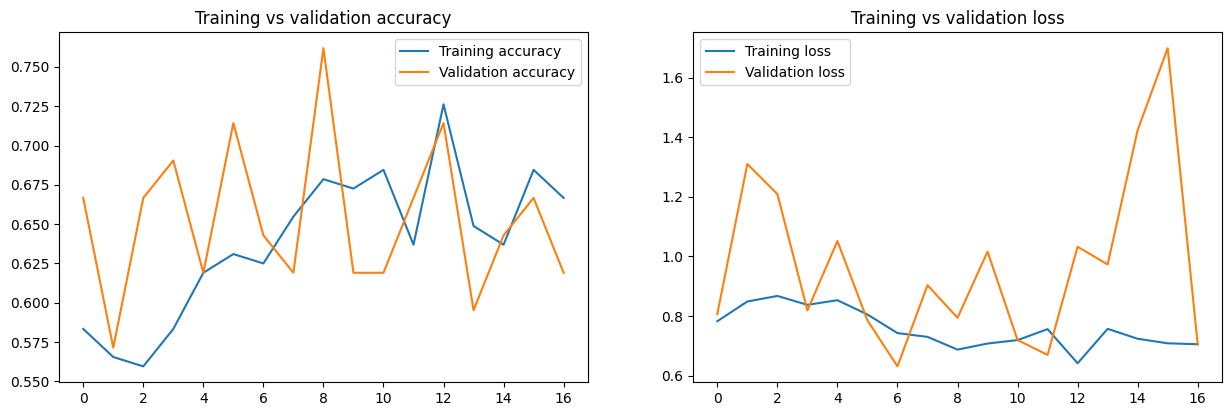

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")
plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")
plt.show()
     

In [25]:
pred = model.predict(test)

3/3 [==============================] - 4s 1s/step


In [26]:
pred = np.argmax(pred, axis=1)

In [27]:
labels = train.class_indices

In [28]:
labels

{'ban mobil': 0, 'ban motor': 1, 'ban truck': 2}

In [29]:
labels = dict((v,k) for k, v in labels.items())

In [30]:
labels

{0: 'ban mobil', 1: 'ban motor', 2: 'ban truck'}

In [31]:
y_pred = [labels[k] for k in pred]

In [32]:
print(classification_report(x_test.label, y_pred))

              precision    recall  f1-score   support

   ban mobil       0.45      0.58      0.51        33
   ban motor       0.90      0.69      0.78        26
   ban truck       0.45      0.41      0.43        32

    accuracy                           0.55        91
   macro avg       0.60      0.56      0.57        91
weighted avg       0.58      0.55      0.56        91



In [33]:
print(confusion_matrix(x_test.label, y_pred))

[[19  1 13]
 [ 5 18  3]
 [18  1 13]]


In [34]:
test_accuracy = model.evaluate(test)[1]

3/3 [==============================] - 5s 1s/step - loss: 0.8472 - accuracy: 0.5385
